In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('data-anz.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df = df.fillna({
    'bpay_biller_code':0,
    'merchant_code':0,
    'card_present_flag':0
})
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,0.0,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,0.0,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,0.0,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,0.0,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,0.0,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,12043.000000,12043.0,12043.000000,12043.000000,12043.000000
mean,0.514324,0.0,14704.195553,30.582330,187.933588
std,0.499816,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,0.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [5]:
df.describe(include='object')

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,12043,12043,12043,12043,12043,7717,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3,100,1,100,6,5725,80,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,150efddf2e5e4e5fb3484fc9d5284f6d,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,12041,578,12043,578,3934,14,746,6285,255,2169,10,1,12043,578,145,11160


In [6]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  12043 non-null  float64       
 2   bpay_biller_code   12043 non-null  object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      12043 non-null  float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

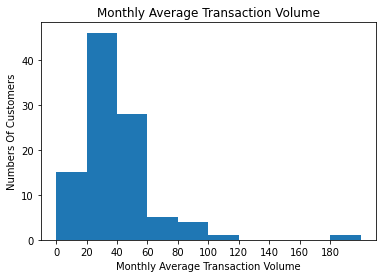

In [18]:
 # To Calculate Monthly Average Transaction Vol
trancvol = df.amount.groupby(df.account)
avg_vol = trancvol.count()/3

plt.hist(avg_vol, bins = range(0,220,20))
plt.xlabel("Monthly Average Transaction Volume")
plt.ylabel("Numbers Of Customers")
plt.xticks(np.arange(0, max(avg_vol)+1, 20.0))
plt.title("Monthly Average Transaction Volume")
plt.show()

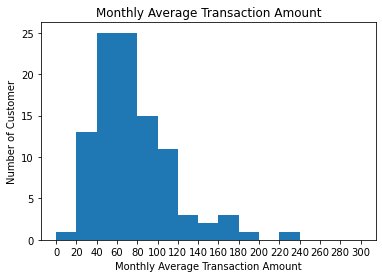

In [19]:
 # To Calculate the Monthly Average Transaction Amount

avg_amt = trancvol.mean()/3

plt.hist(avg_amt,bins = range(0,320,20))
plt.xlabel('Monthly Average Transaction Amount')
plt.ylabel('Number of Customer')
plt.xticks(np.arange(0, 320, 20.0))
plt.title("Monthly Average Transaction Amount")
plt.show()

In [10]:
# Calculate the distance from respective customer to Merchant they have transaction with

df_L = df[['account','long_lat','merchant_long_lat']]
#M_list = df[merchant_long_lat.groupby(df.account)
df_L.dropna(inplace=True)
df_L.drop_duplicates(inplace=True)
df_L.sort_values('long_lat', inplace=True)
df_L.reset_index(drop = True, inplace = True)

# Get names of indexes for which column Account  has value 'ACC-2901672282'
indexNames = df_L[df_L['account'] == 'ACC-2901672282'].index
 
# Delete these row indexes from dataFrame
df_L.drop(indexNames , inplace=True)

F:\Miniconda\envs\my-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
F:\Miniconda\envs\my-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Miniconda\envs\my-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
F:\Miniconda\envs\my-env\lib\site-packages\pandas\core\frame.py:3997: SettingWith

In [11]:
df_L.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5639 entries, 0 to 5638
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account            5639 non-null   object
 1   long_lat           5639 non-null   object
 2   merchant_long_lat  5639 non-null   object
dtypes: object(3)
memory usage: 176.2+ KB


In [12]:
df_L['Long'] = df_L.long_lat.str.split(' ').str[0].astype(float)
df_L['Lat'] = df_L.long_lat.str.split(' ').str[1].astype(float)
df_L['Long2'] = df_L.merchant_long_lat.str.split(' ').str[0].astype(float)
df_L['Lat2'] = df_L.merchant_long_lat.str.split(' ').str[1].astype(float)
df_L.head()

F:\Miniconda\envs\my-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
F:\Miniconda\envs\my-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Miniconda\envs\my-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,account,long_lat,merchant_long_lat,Long,Lat,Long2,Lat2
0,ACC-1990648130,114.62 -28.80,153.45 -28.85,114.62,-28.8,153.45,-28.85
1,ACC-1990648130,114.62 -28.80,114.63 -28.76,114.62,-28.8,114.63,-28.76
2,ACC-1990648130,114.62 -28.80,151.02 -33.88,114.62,-28.8,151.02,-33.88
3,ACC-1990648130,114.62 -28.80,114.61 -28.77,114.62,-28.8,114.61,-28.77
4,ACC-1990648130,114.62 -28.80,145.15 -37.83,114.62,-28.8,145.15,-37.83


In [13]:
 df_L.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5639 entries, 0 to 5638
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   account            5639 non-null   object 
 1   long_lat           5639 non-null   object 
 2   merchant_long_lat  5639 non-null   object 
 3   Long               5639 non-null   float64
 4   Lat                5639 non-null   float64
 5   Long2              5639 non-null   float64
 6   Lat2               5639 non-null   float64
dtypes: float64(4), object(3)
memory usage: 352.4+ KB


In [14]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

df_L['distance'] = [haversine(df_L.Long[i],df_L.Lat[i],df_L.Long2[i],df_L.Lat2[i]) for i in range(len(df_L))]

F:\Miniconda\envs\my-env\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
df_L.shape

(5639, 8)

(22.0, 300.0)

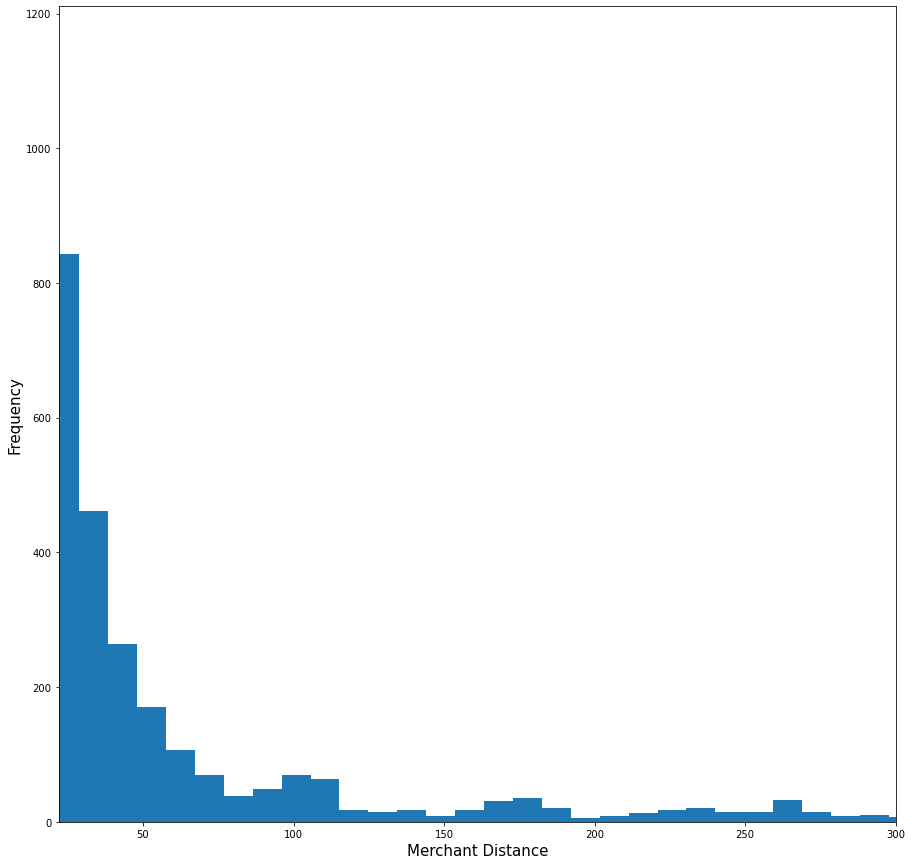

In [16]:
df_L.distance.hist(bins = 400, grid=False, xlabelsize=10, ylabelsize=10, figsize = (15,15) )
plt.xlabel('Merchant Distance', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xlim([22.0,300.0])